# Red neuronal artificial (ANN)

Por Zarco Romero José Antonio

**Objetivo.** Desarrollar una red neuronal tradicional (perceptrón multicapa) para resolver un problema de clasificación o regresión.


1. [Selección del conjunto de datos](#1)
2. [Análisis exploratorio de datos](#eda)
3. [Desarrollo de la red neuronal](#desarrollo)
4. [Evaluación del modelo](#eval)
5. [Interpretación del modelo](#interpretacion)

<a id="1"></a>
## Selección del conjunto de datos

En este proyecto, trabajaré en la clasificación de imágenes de ropa con el objetivo de entrenar un modelo capaz de reconocer el tipo de prenda de vestir a partir de una imagen de un artículo de tienda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

Utilizaré el [Fashion-MNIST](https://keras.io/api/datasets/mnist/) dataset de Keras para entrenar y evaluar el modelo.

Este conjunto de datos está compuesto por imágenes en escala de grises de artículos de moda que tienen un tamaño de **28x28** píxeles y están etiquetadas en **10** clases diferentes.
- 0: Camiseta (T-shirt/top)
- 1: Pantalón (Trouser)
- 2: Suéter (Pullover)
- 3: Vestido (Dress)
- 4: Abrigo (Coat)
- 5: Sandalia (Sandal)
- 6: Camisa (Shirt)
- 7: Zapatilla deportiva (Sneaker)
- 8: Bolsa (Bag)
- 9: Bota (Ankle boot)

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
df_train = pd.DataFrame(X_train.reshape(-1, 28*28))

<a id="eda"></a>
## Análisis Exploratorio de Datos

Tamaño del dataset

In [4]:
df_train.shape

(60000, 784)

Información general

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB


In [6]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Descripcion de las **categóricas**

In [7]:
try:
    df_train.describe(include=['O'])
except Exception as e:
    print("No hay variables categóricas en el DataFrame.")

No hay variables categóricas en el DataFrame.


Datos categóricos

In [8]:
cols_categoricas = df_train.select_dtypes(include='object').columns
for col in cols_categoricas:
    print(f'{col}: {df_train[col].unique()}')
    print(df_train[col].value_counts())

Resumen estadístico de las **variables numéricas**

In [9]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


Varianza de las columnas numéricas

In [10]:
df_train.select_dtypes(include=np.number).var()

,0
0,0.008566
1,0.062018
2,0.589621
3,6.310231
4,18.760821
...,...
779,2040.657172
780,867.220850
781,297.862091
782,83.416296


Columnas de tipo numérico

In [11]:
num_cols_train = df_train.select_dtypes(include='number').columns
num_cols_train

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       774, 775, 776, 777, 778, 779, 780, 781, 782, 783],
      dtype='int64', length=784)

Valores nulos

In [12]:
df_train.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
779,0
780,0
781,0
782,0


In [13]:
df_train.isna().sum() / len(df_train)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


## Preprocesamiento de los datos

In [14]:
cols_con_nulos = [col for col in df_train.columns if df_train[col].isnull().any()]

if not cols_con_nulos:
    print("No hay columnas con valores faltantes")
else:
    # Creamos un objeto SimpleImputer  para remplazar los valores faltantes con la mediana
    imputer = SimpleImputer(strategy='median')
    # Ajusta e imputa los valores faltantes en las columnas numericas
    df_train[cols_con_nulos] = imputer.fit_transform(df_train[cols_con_nulos])
    print('Nulos en los nuevos datos', df_train.isna().sum())
    print('Mediana en los nuevos datos', df_train[cols_con_nulos].median())

No hay columnas con valores faltantes


<a id="desarrollo"></a>
## Desarrollo de la red neuronal

### División del conjunto de datos

In [15]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
print('Tamaño de X_train:', X_train.shape)
print('Tamaño de y_train:', y_train.shape)
print('Tamaño de X_test:', X_test.shape)
print('Tamaño de y_test:', y_test.shape)

Tamaño de X_train: (60000, 28, 28)
Tamaño de y_train: (60000,)
Tamaño de X_test: (10000, 28, 28)
Tamaño de y_test: (10000,)


### Visualización de los datos

In [17]:
nombres_columnas = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolsa', 'Bota']

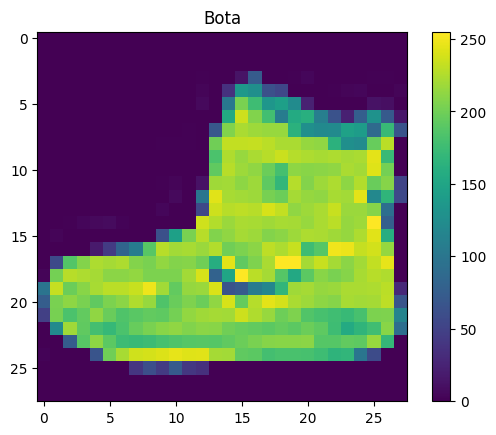

In [18]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.title(nombres_columnas[y_train[0]])
plt.show()

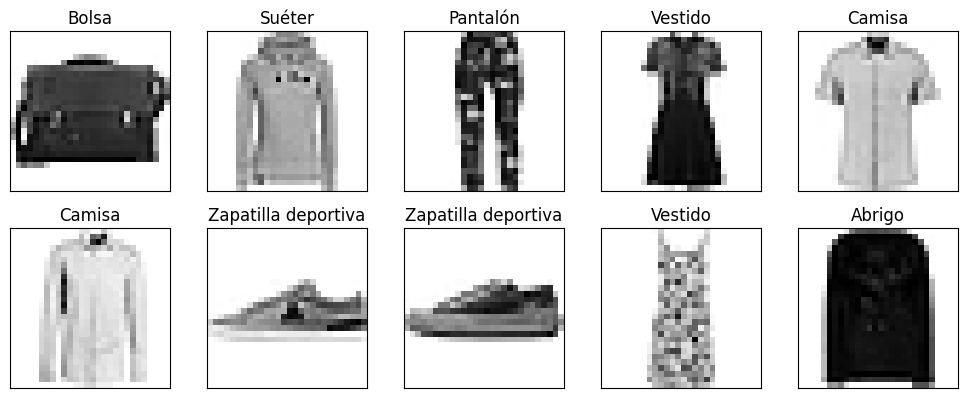

In [19]:
imagenes = np.random.randint(1, y_train.shape, size=10)
plt.figure(figsize=(10,10))
for i, imagen in enumerate(imagenes):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[imagen], cmap = plt.cm.binary)
    plt.title(nombres_columnas[y_train[imagen]])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### Normalización

Puesto que las imágenes presentan sus valores de pixeles en el rango de 0 a 255, se normalizan los datos para que estén en un rango de 0 a 1, facilitando así el entrenamiento de la red neuronal.

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Modelo para apilar las capas

In [21]:
model = Sequential()

Puesto que el dataset de Fashion MNIST guarda imágenes como arreglos de de $28 \times 28$ píxeles, nos apoyamos de Flatten para convertir el tensor 2D a un vector lineal y procesar la información más eficiente.

In [22]:
model.add(Flatten(input_shape=(28, 28)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


El **número de capas** y **número de neuronas** en cada capa se eligieron para balancear la complejidad y capacidad de la red. En este caso, se utilizaron **3 capas** ocultas con *128, 64, 32* neuronas para aprender patrones progresivamente más abstractos de los datos, comenzando con un gran número de neuronas para capturar la mayor información posible y luego reduciendo progresivamente para evitar sobreajuste.

Se utilizó la función de activación **ReLU** pues permite aprender no linealidades y favorece un entrenamiento más rápido y estable.

In [23]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

El parámetro `units` especifica cuántas neuronas tendrá esta capa densa. En este caso, la capa tiene 10 neuronas pues el dataset de Fashion MNIST tiene 10 categorías (e.g., camisetas, zapatos, pantalones, etc.). Misma razón por la cual la función de activación **softmax** es útil en esta clasificación multiclase ya que transforma las salidas en probabilidades.

In [24]:
model.add(Dense(activation='softmax', units=10))

La **función de costo** `sparse_categorical_crossentropy` es adecuada para clasificación multiclase, ya que las etiquetas están codificadas de manera entera.

Se eligieron **5 epochs** para proporcionar suficiente tiempo de entrenamiento para que el modelo converja.

El **optimizador "adam"** fue seleccionado por su eficiencia en problemas de optimización, ajustando su **tamaño de batch** al estándar de **32**.

En cuanto a las **capas de entrada y salida**, las neuronas de entrada corresponden a las dimensiones de las imágenes (28x28 píxeles, 784 valores de entrada), mientras que la capa de salida tiene 10 neuronas, una por cada clase.

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [26]:
data = model.fit(X_train, y_train,
                  epochs=5,
                  batch_size=32,
                  validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7690 - loss: 0.6623 - val_accuracy: 0.8458 - val_loss: 0.4380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8586 - loss: 0.3847 - val_accuracy: 0.8466 - val_loss: 0.4219
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8755 - loss: 0.3398 - val_accuracy: 0.8686 - val_loss: 0.3612
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8840 - loss: 0.3151 - val_accuracy: 0.8666 - val_loss: 0.3690
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8888 - loss: 0.3000 - val_accuracy: 0.8697 - val_loss: 0.3658


### Predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


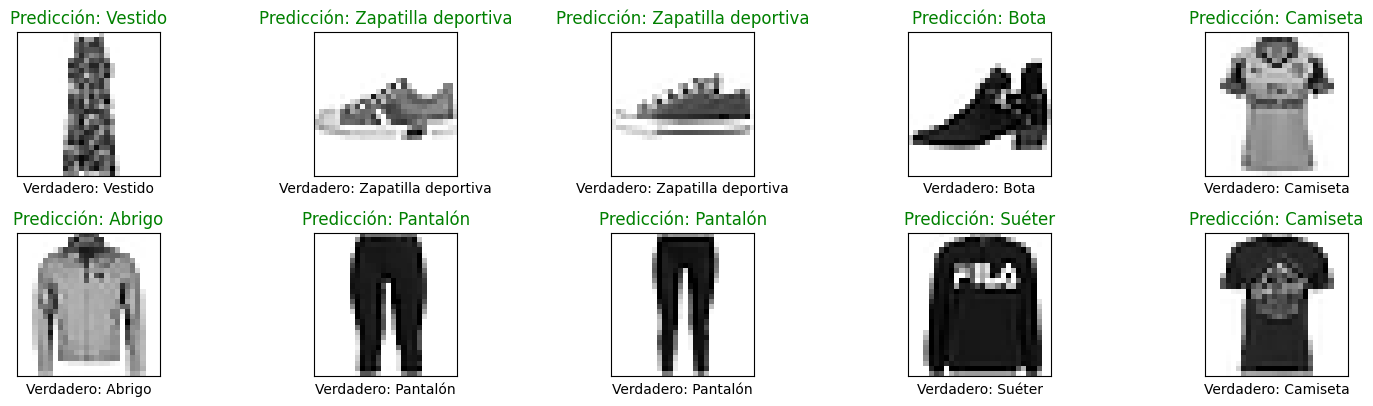

In [40]:
imagenes = np.random.randint(1, y_train.shape, size=10)
plt.figure(figsize=(15,10))
for i, imagen in enumerate(imagenes):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[imagen], cmap = plt.cm.binary)
    prediccion = np.argmax(model.predict(X_train[imagen].reshape(1, 28, 28)))
    color = "green" if prediccion == y_train[imagen] else "red"
    plt.title(f"Predicción: {nombres_columnas[prediccion]}", color=color)
    plt.xlabel(f"Verdadero: {nombres_columnas[y_train[imagen]]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

<a id="eval"></a>
## Evaluación del modelo

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8700 - loss: 0.3690
Loss: 0.3658420145511627
Accuracy: 0.869700014591217


In [29]:
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
print('Exactitud del modelo optimizado: ', accuracy_score(y_test, y_pred))
print('Reporte de clasificación del modelo optimizado: ', classification_report(y_test, y_pred))

Exactitud del modelo optimizado:  0.8697
Reporte de clasificación del modelo optimizado:                precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       1.00      0.95      0.98      1000
           2       0.75      0.85      0.80      1000
           3       0.76      0.95      0.85      1000
           4       0.86      0.66      0.75      1000
           5       0.97      0.96      0.97      1000
           6       0.69      0.65      0.67      1000
           7       0.92      0.97      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



<a id="interpretacion"></a>
## Interpretación del modelo

Matriz de confusión

Text(70.7222222222222, 0.5, 'Verdadero')

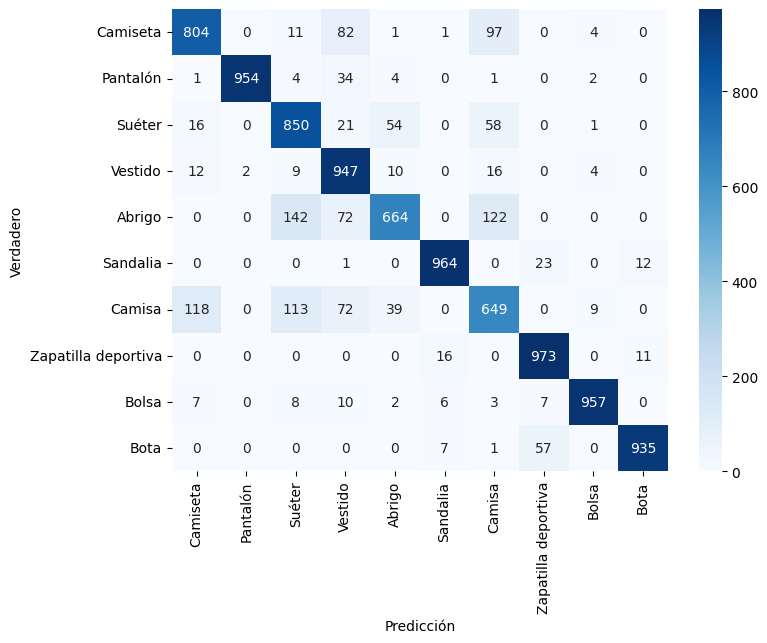

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nombres_columnas, yticklabels=nombres_columnas)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

Se puede observar mediante la matriz de confusión que la mayoría de las clases tienen un alto número en la diagonal, lo que indica que el modelo está prediciendo correctamente la categoría de la ropa , pero podría mejorar en diferenciar entre algunas categorías específicas, como Abrigo y Suéter.

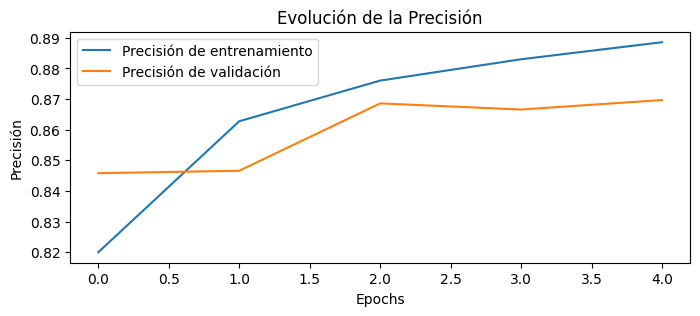

In [32]:
plt.figure(figsize=(8,3))
plt.plot(data.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(data.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la Precisión')
plt.show()

Podemos concluir que el modelo parece estar funcionando bien, pues tanto la precisión del entrenamiento como de la validación aumentan constantemente.
Sin embargo, sería útil monitorear la brecha entre la precisión de entrenamiento y validación para asegurarse de que no esté sobreajustando.